In [33]:
import datetime as dt
import yfinance as yf
import matplotlib.pyplot as plt
import matplotlib.dates as mdates
from pandas_datareader import data as pdr
from mplfinance.original_flavor import candlestick_ohlc

In [44]:
# Define Time Frame

start = dt.datetime(2021,1,1)
end = dt.datetime.now()

ticker = 'GC=F'
data = pdr.DataReader(ticker, start, end)

print(data)
print('columns: ', data.columns)

[*********************100%***********************]  1 of 1 completed
                   Open         High          Low        Close    Adj Close  \
Date                                                                          
2021-01-04  1912.199951  1945.099976  1912.199951  1944.699951  1944.699951   
2021-01-05  1941.699951  1952.699951  1941.300049  1952.699951  1952.699951   
2021-01-06  1952.000000  1959.900024  1901.500000  1906.900024  1906.900024   
2021-01-07  1922.599976  1926.699951  1912.000000  1912.300049  1912.300049   
2021-01-08  1908.000000  1908.000000  1834.099976  1834.099976  1834.099976   
...                 ...          ...          ...          ...          ...   
2023-02-09  1875.300049  1884.599976  1859.800049  1866.199951  1866.199951   
2023-02-10  1861.599976  1863.500000  1852.400024  1862.800049  1862.800049   
2023-02-13  1859.000000  1861.000000  1850.000000  1851.900024  1851.900024   
2023-02-14  1854.099976  1862.000000  1846.199951  1854.000000

In [45]:
data = data[['Open', 'High', 'Low', 'Close']]
data.head()

,Open,High,Low,Close
Date,,,,
2021-01-04,1912.199951,1945.099976,1912.199951,1944.699951
2021-01-05,1941.699951,1952.699951,1941.300049,1952.699951
2021-01-06,1952.000000,1959.900024,1901.500000,1906.900024
2021-01-07,1922.599976,1926.699951,1912.000000,1912.300049
2021-01-08,1908.000000,1908.000000,1834.099976,1834.099976


In [46]:
data.reset_index(inplace=True)
data.head()

,Date,Open,High,Low,Close
0,2021-01-04,1912.199951,1945.099976,1912.199951,1944.699951
1,2021-01-05,1941.699951,1952.699951,1941.300049,1952.699951
2,2021-01-06,1952.000000,1959.900024,1901.500000,1906.900024
3,2021-01-07,1922.599976,1926.699951,1912.000000,1912.300049
4,2021-01-08,1908.000000,1908.000000,1834.099976,1834.099976


In [47]:
data['Date'] = data['Date'].map(mdates.date2num)
data.head()

/var/folders/dx/vd193n3j0p3f_lz26qv9vxxw0000gn/T/ipykernel_9651/2954052745.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data['Date'] = data['Date'].map(mdates.date2num)


,Date,Open,High,Low,Close
0,18631.0,1912.199951,1945.099976,1912.199951,1944.699951
1,18632.0,1941.699951,1952.699951,1941.300049,1952.699951
2,18633.0,1952.000000,1959.900024,1901.500000,1906.900024
3,18634.0,1922.599976,1926.699951,1912.000000,1912.300049
4,18635.0,1908.000000,1908.000000,1834.099976,1834.099976


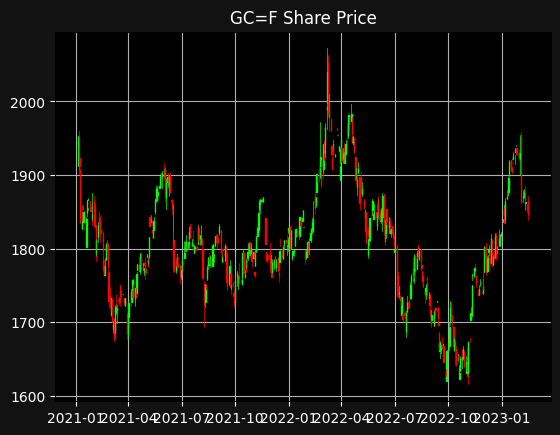

In [48]:
# Visualization

ax = plt.subplot()
ax.grid(True)
ax.set_axisbelow(True)
ax.set_title('{} Share Price'.format(ticker), color='white')
ax.set_facecolor('black')
ax.figure.set_facecolor('#121212')
ax.tick_params(axis='x', colors='white')
ax.tick_params(axis='y', colors='white')

ax.xaxis_date()

candlestick_ohlc(ax, data.values, width=0.5, colorup='#00ff00')
plt.show()